In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
from lab_utils_common import dlc, plot_data
from plt_one_addpt_onclick import plt_one_addpt_onclick
plt.style.use('./deeplearning.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('winequality-red.csv', delimiter=";")
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print("Null values in each column:")
null=data.isnull().sum()
print(null)

Null values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


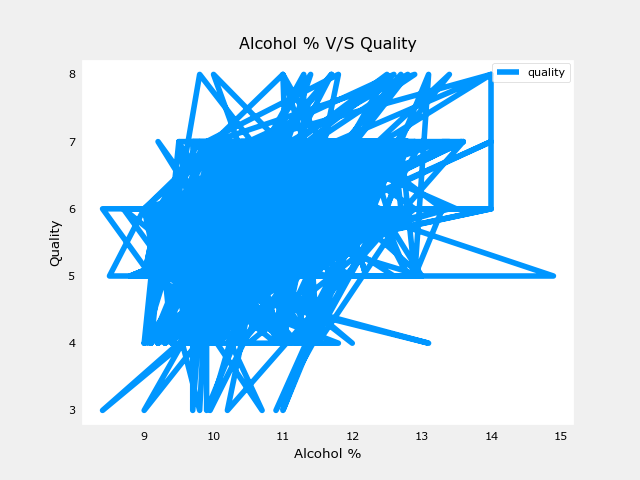

In [6]:
data.columns = ('fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality')

data.plot(kind = 'line', x = "alcohol", y = "quality", xlabel="Alcohol %", ylabel="Quality",title='Alcohol % V/S Quality')
plt.show()

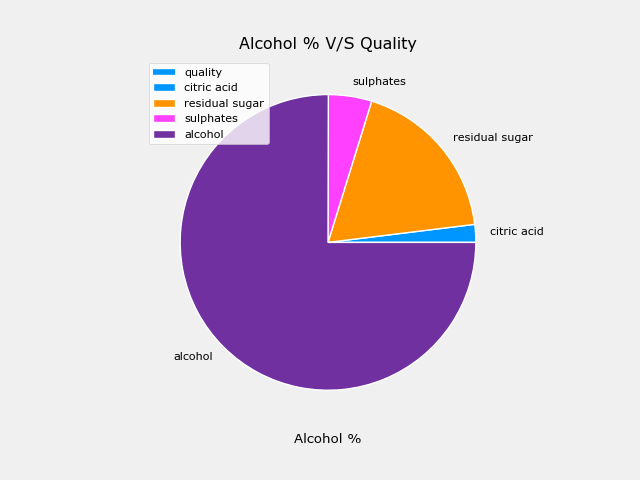

In [7]:

dmeans=data.mean()
f=dmeans.iloc[2:4]
g=dmeans.iloc[9:11]
new=pd.concat([f, g], axis=0)
piechart=new.plot(kind="pie",legend="Composition of Red Wine. ",wedgeprops={ "linewidth" : 1,"edgecolor" : "w"});
plt.show()

In [8]:
z=data.iloc[:, 8]
p=10**-z[3]
list=[]
for i in range(1599):
    y=10**-z[i]
    list.append(y)
m=pd.DataFrame(np.array(list))
data.insert(9, "Antilog", m)
print(data)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

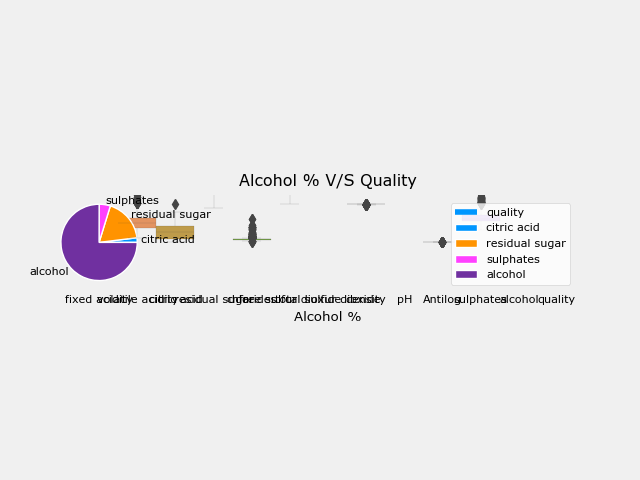

In [9]:
box=sb.boxplot(data,width=1,linewidth=0.1)
plt.show()

In [10]:
matrix = data.corr()
print(matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
Antilog                    0.670361         -0.208310     0.534575   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                   

In [11]:
grade = [] 
for i in data['quality']: 
    if i > 6.5:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
data['grade'] = grade
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [12]:
x = data.drop('grade', axis =1 )
y = data['grade']

In [13]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
variables = data[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',]]
x = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif



,VIF,features
0,1.710538e+06,const
1,7.767512e+00,fixed acidity
2,1.789390e+00,volatile acidity
3,3.128022e+00,citric acid
4,1.702588e+00,residual sugar
5,1.481932e+00,chlorides
6,1.963019e+00,free sulfur dioxide
7,2.186813e+00,total sulfur dioxide
8,6.343760e+00,density
9,3.329732e+00,pH


In [14]:
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.3, random_state  = 365)

In [16]:
#
reg = LogisticRegression()
reg.fit(x_train,y_train)
y_0 = reg.predict(x_test)
acc = metrics.accuracy_score(y_0,y_test)
print(acc)

from sklearn.metrics import confusion_matrix
cm0 = confusion_matrix(y_0,y_test)
cm0
cm0_data = pd.DataFrame(cm0)
cm0_data.columns = ['Predicted 0','Predicted 1']
cm0_data = cm0_data.rename(index={0: 'Actual 0',1:'Actual 1'})
cm0_data


0.875


,Predicted 0,Predicted 1
Actual 0,403,42
Actual 1,18,17


In [17]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_1 = dt.predict(x_test)
acc_1 = metrics.accuracy_score(y_1,y_test)
print(acc_1)

cm1 = confusion_matrix(y_1,y_test)
cm1
cm1_data = pd.DataFrame(cm1)
cm1_data.columns = ['Predicted 0','Predicted 1']
cm1_data = cm1_data.rename(index={0: 'Actual 0',1:'Actual 1'})
cm1_data

0.8541666666666666


,Predicted 0,Predicted 1
Actual 0,380,29
Actual 1,41,30


In [18]:
#Support Vector Machine
sv = svm.SVC()
sv.fit(x_train,y_train)
y_2 = sv.predict(x_test)
acc_2 = metrics.accuracy_score(y_2,y_test)
print(acc_2)

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_2,y_test)
cm2
cm2_data = pd.DataFrame(cm2)
cm2_data.columns = ['Predicted 0','Predicted 1']
cm2_data = cm2_data.rename(index={0: 'Actual 0',1:'Actual 1'})
cm2_data

0.8979166666666667


,Predicted 0,Predicted 1
Actual 0,413,41
Actual 1,8,18


In [19]:
#K-Nearest Neighbours
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
y_3 = knc.predict(x_test)
acc_3 = metrics.accuracy_score(y_3,y_test)
print(acc_3)

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_3,y_test)
cm3
cm3_data = pd.DataFrame(cm3)
cm3_data.columns = ['Predicted 0','Predicted 1']
cm3_data = cm3_data.rename(index={0: 'Actual 0',1:'Actual 1'})
cm3_data

0.8708333333333333


,Predicted 0,Predicted 1
Actual 0,394,35
Actual 1,27,24


In [20]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_4=gnb.predict(x_test)
acc_4= metrics.accuracy_score(y_4,y_test)
print(acc_4)

from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_4,y_test)
cm4
cm4_data = pd.DataFrame(cm4)
cm4_data.columns = ['Predicted 0','Predicted 1']
cm4_data = cm4_data.rename(index={0: 'Actual 0',1:'Actual 1'})
cm4_data


0.8270833333333333


,Predicted 0,Predicted 1
Actual 0,362,24
Actual 1,59,35


In [21]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_5=rfc.predict(x_test)
acc_5= metrics.accuracy_score(y_5,y_test)
print(acc_5)


cm5 = confusion_matrix(y_5,y_test)
cm5
cm5_data = pd.DataFrame(cm5)
cm5_data.columns = ['Predicted 0','Predicted 1']
cm5_data = cm5_data.rename(index={0: 'Actual 0',1:'Actual 1'})
cm5_data

0.91875


,Predicted 0,Predicted 1
Actual 0,413,31
Actual 1,8,28
